# Machine Learning Engineer Nanodegree
## House Prices: Advanced Regression Techniques

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Visuals and graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load training data
train_raw = pd.read_csv('housing/train.csv')
test_raw = pd.read_csv('housing/test.csv')

# Basic exploration
print("The housing dataset has {} data points with {} variables each.".format(*train_raw.shape))
train_raw.head(10)

The housing dataset has 1460 data points with 81 variables each.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

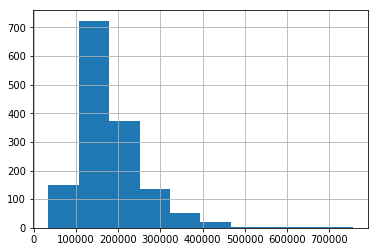

In [2]:
target_y = train_raw.SalePrice
target_y.hist()
target_y.describe()

In [3]:
# One hot encode data for data analysis
encoded_train = pd.get_dummies(train_raw)
encoded_test = pd.get_dummies(test_raw)

# Categorical data has been enumerated
print("Features have increased from {} to {}".format(train_raw.shape[1], encoded_train.shape[1]))

Features have increased from 81 to 290


In [4]:
def detect_outliers(columns, data):
    outliers = []

    for feature in columns:

        # TODO: Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(data[feature], 25)

        Q2 = np.percentile(data[feature], 50)

        # TODO: Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(data[feature], 75)

        # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = (Q3-Q1) * 1.5

        # Display the outliers
        #print "Data points considered outliers for the feature '{}':".format(feature)
        df = data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))]
        #display("{} median: {}".format(feature, Q2))
        #display("{} step: {}".format(feature, step))
        display("{} number found: {}".format(feature, len(df.index.tolist())))
        #display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])
        items = df.Id.tolist()
        outliers.append((feature, items))
    return outliers

In [5]:
from sklearn.metrics import mean_squared_error
import math

def rmlse(y_true, y_pred):
    result = (math.sqrt(mean_squared_error(np.log(y_true), np.log(y_pred))))
    # print(result)
    return result

In [6]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Initial training
    model[1].fit(X_train, y_train)
    
    # Use the model to make predictions
    y_pred = model[1].predict(X_test)
    score = rmlse(y_test, y_pred)
    
    return model, score
    

'GrLivArea number found: 31'

[59, 119, 186, 198, 232, 305, 325, 497, 524, 584, 609, 636, 692, 770, 799, 804, 962, 1025, 1032, 1047, 1143, 1170, 1174, 1176, 1183, 1269, 1299, 1313, 1329, 1354, 1387]


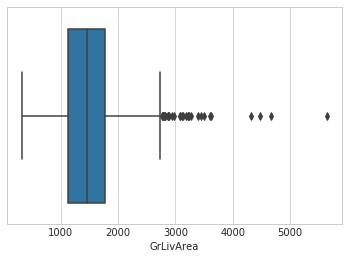

In [7]:
#df = detect_outliers(['2ndFlrSF','FullBath', 'GarageArea', 'GrLivArea', 'LotArea', 'OverallQual', 'TotalBsmtSF', 
#           'YearBuilt', 'YearRemodAdd', 'YrSold', 'MSZoning_RL'], encoded_train)

#print(df)
outliers = detect_outliers(['GrLivArea'], encoded_train)
#pandas.DataFrame.plot.scatter
print(outliers[0][1])
#encoded_train[outliers[1]]
sns.set_style("whitegrid")

ax = sns.boxplot(x=encoded_train['GrLivArea'])

In [8]:
encoded_train.fillna(encoded_train.mean(), inplace=True)
encoded_test.fillna(encoded_test.mean(), inplace=True)


In [9]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
columns = [x for x in encoded_train.columns if x != 'SalePrice' and x in encoded_test.columns]
X = encoded_train[columns]
y = encoded_train.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

models = [('ExtraTreesRegressor', ExtraTreesRegressor(max_depth=8, random_state=0)),
          ('RandomForestRegressor', RandomForestRegressor(max_depth=7, random_state=0)), 
          ('LinearRegression', LinearRegression()), 
          ('Lasso', Lasso(alpha=0.01, max_iter=10000)),
          ('Ridge', Ridge(alpha=.5, normalize=True, random_state=0, max_iter=1000)),
          ('SVR', SVR(C=1.0, epsilon=0.2)),
          ('ElasticNet', ElasticNet(random_state=0, normalize=True)),
          ('XGBRegressor', XGBRegressor())]
models = [('XGBRegressor', XGBRegressor(random_state=0))]

#for model in models:
#    try:
#        model, score = evaluate_model(model, X_train, X_test, y_train, y_test)
#    except ValueError:
#         print('error', model[0])
#    print("{} score: {}".format(model[0], score))


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
rmlse_scorer = make_scorer(rmlse, greater_is_better=False)
# A parameter grid for XGBoost
params = {'max_depth': range(1, 11),
          'n_estimators': [1, 100, 200],
          'booster': ['gbtree', 'gblinear', 'dart']} 
# Initialize XGB and GridSearch
xgb = XGBRegressor(nthread=-1) 

#grid = GridSearchCV(xgb, params, scoring=rmlse_scorer)
#grid.fit(X, y)

#y_pred = grid.predict(X_test)
#score = rmlse(y_test, y_pred)

#predicted_prices = grid.predict(encoded_test[columns])



In [11]:
#grid.best_params_

In [16]:
xgb = XGBRegressor(booster='dart', max_depth=3, n_estimators=200)
model = ('XGB', xgb)

try:
    model, score = evaluate_model(model, X_train, X_test, y_train, y_test)
    print("{} score: {}".format(model[1], score))
    xgb.fit(X, y)
    predicted_prices = xgb.predict(encoded_test[columns])
    submission = pd.DataFrame({'Id': encoded_test.Id, 'SalePrice': predicted_prices})
    submission.to_csv('submission.csv', index=False)
except ValueError:
    print('ValueError', model[0])



XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1) score: 0.123728965345
